In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math

In [3]:
df = pd.read_csv("Weather_data_2017.csv")
df.head(5)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2017-01-01,2017,1,1,NaN,-8.8,...,NaN,M,0.2,NaN,11.0,NaN,31.0,NaN,32,NaN
1,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2017-01-02,2017,1,2,NaN,-14.0,...,NaN,M,0.2,NaN,9.0,NaN,NaN,NaN,<31,NaN
2,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2017-01-03,2017,1,3,NaN,-13.3,...,NaN,M,0.0,NaN,10.0,NaN,NaN,NaN,<31,NaN
3,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2017-01-04,2017,1,4,NaN,-7.3,...,NaN,M,0.0,NaN,10.0,NaN,NaN,NaN,<31,NaN
4,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2017-01-05,2017,1,5,NaN,-5.7,...,NaN,M,1.8,NaN,10.0,NaN,NaN,NaN,<31,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              365 non-null    float64
 1   Latitude (y)               365 non-null    float64
 2   Station Name               365 non-null    object 
 3   Climate ID                 365 non-null    int64  
 4   Date/Time                  365 non-null    object 
 5   Year                       365 non-null    int64  
 6   Month                      365 non-null    int64  
 7   Day                        365 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              363 non-null    float64
 10  Max Temp Flag              3 non-null      object 
 11  Min Temp (°C)              365 non-null    float64
 12  Min Temp Flag              3 non-null      object 
 13  Mean Temp (°C)             363 non-null    float64

In [19]:
df["Date/Time"] = df["Date/Time"].astype('datetime64[ns]')

In [32]:
mean_temp = pd.DataFrame(df[['Month', 'Mean Temp (°C)']])
mean_temp.sample(3)

,Month,Mean Temp (°C)
104,4,-2.4
79,3,-2.5
192,7,18.1


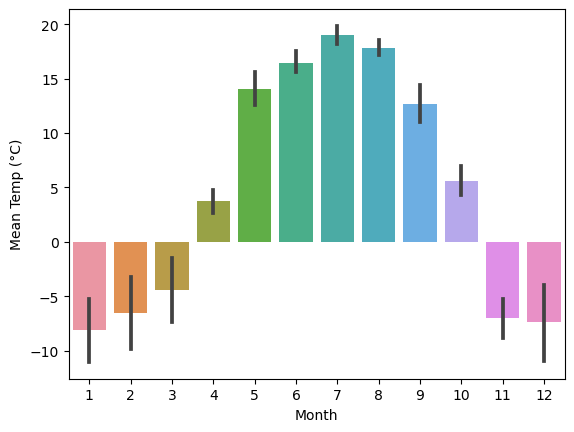

In [33]:
sns.barplot(x = 'Month', y = 'Mean Temp (°C)', data = mean_temp)
plt.show()